In [19]:
import numpy as np
import pandas as pd
import re
import nltk
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
true_data = pd.read_csv('/content/True.csv')
fake_data = pd.read_csv('/content/Fake.csv')

In [21]:
true_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [22]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [23]:
# Adding labels
true_data["label"] = np.ones(len(true_data),dtype=int)
fake_data["label"] = np.zeros(len(fake_data),dtype=int)

true_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Concatenating the data

In [24]:
data = pd.concat((true_data,fake_data),axis=0)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB
None


In [25]:
data = data.sample(frac=1)
data.head(10)

,title,text,subject,date,label
3414,BREAKING: Russian Officials Celebrate Rex Til...,Quid pro quo in the Trump/Russia situation is ...,News,"December 14, 2016",0
17247,"China will not deviate from path of reform, sa...",BEIJING (Reuters) - China has set a clear dir...,worldnews,"October 17, 2017",1
17285,Venezuela vote dispute escalates foreign sanct...,CARACAS (Reuters) - Venezuela s opposition cri...,worldnews,"October 15, 2017",1
21408,SAY WHAT? Tide Detergent Joins Forces With Ope...,I wish there was some way I could let Tide Det...,left-news,"Oct 17, 2015",0
9170,"HOW IS THIS POSSIBLE? LATINO IMMIGRANT, ANTI-T...",The fact that it has taken so long to uncover ...,politics,"Dec 18, 2017",0
21375,GERMAN VOLUNTEERS HOLD WELCOME RALLY: Applaud ...,"Say goodbye to your economy, traditions and cu...",left-news,"Oct 31, 2015",0
5895,Merkel says fight against terrorism no excuse ...,BERLIN (Reuters) - German Chancellor Angela Me...,politicsNews,"January 29, 2017",1
10436,NEW BOMBSHELL REPORT Shows DNC Emails Were Cop...,DNC staffer Seth Rich was shot in the back sev...,politics,"Jul 10, 2017",0
114,Sean Hannity Barely Spends 6 Seconds On Last ...,Fox News host Sean Hannity spent a whopping ...,News,"November 8, 2017",0
9920,#BoycottJemeleHill #ESPN Gives Racist Pig Host...,ESPN host Jemele Hill called President Trump a...,politics,"Sep 13, 2017",0


# EDA

Almost balanced data

In [26]:
data["subject"].value_counts()

,count
subject,
politicsNews,11272
worldnews,10145
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


8 type of subjects in the dataset.
politicsNews is most common.

# Data Preprocessing

In [27]:
data = pd.get_dummies(data,columns=["subject"])
data.head()

,title,text,date,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
3414,BREAKING: Russian Officials Celebrate Rex Til...,Quid pro quo in the Trump/Russia situation is ...,"December 14, 2016",0,False,False,True,False,False,False,False,False
17247,"China will not deviate from path of reform, sa...",BEIJING (Reuters) - China has set a clear dir...,"October 17, 2017",1,False,False,False,False,False,False,False,True
17285,Venezuela vote dispute escalates foreign sanct...,CARACAS (Reuters) - Venezuela s opposition cri...,"October 15, 2017",1,False,False,False,False,False,False,False,True
21408,SAY WHAT? Tide Detergent Joins Forces With Ope...,I wish there was some way I could let Tide Det...,"Oct 17, 2015",0,False,False,False,False,True,False,False,False
9170,"HOW IS THIS POSSIBLE? LATINO IMMIGRANT, ANTI-T...",The fact that it has taken so long to uncover ...,"Dec 18, 2017",0,False,False,False,False,False,True,False,False


In [28]:
data = data.drop("date",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 3414 to 18981
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    44898 non-null  object
 1   text                     44898 non-null  object
 2   label                    44898 non-null  int64 
 3   subject_Government News  44898 non-null  bool  
 4   subject_Middle-east      44898 non-null  bool  
 5   subject_News             44898 non-null  bool  
 6   subject_US_News          44898 non-null  bool  
 7   subject_left-news        44898 non-null  bool  
 8   subject_politics         44898 non-null  bool  
 9   subject_politicsNews     44898 non-null  bool  
 10  subject_worldnews        44898 non-null  bool  
dtypes: bool(8), int64(1), object(2)
memory usage: 1.7+ MB


## NLP

In [33]:
import nltk
from tqdm import tqdm
nltk.download('punkt_tab')
nltk.download('wordnet')
new_text = []
pattern = "[^a-zA-Z]"
lemma = nltk.WordNetLemmatizer()

for txt in tqdm(data.text):

    txt = re.sub(pattern," ",txt) # Cleaning
    txt = txt.lower() # Lowering
    txt = nltk.word_tokenize(txt) # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt] # Lemmatizing
    txt = " ".join(txt)
    new_text.append(txt)


new_text[0]


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
100%|██████████| 44898/44898 [03:10<00:00, 235.52it/s]


'quid pro quo in the trump russia situation is happening sooner than expected at least according to russian official you know they give him a gift by using hacking a propaganda to hand him the election and trump build a nightmarish team for himself that will be very friendly to russia so friendly in fact that the kremlin is pretty openly celebrating trump s newest gift to them thus far the donald ha filled his cabinet to the brim with so many pro russian people that stolichnaya stock have gone through the roof just joking don t bother googling that seriously though russia is thrilled with trump s selection so far but it is rex tillerson s nomination for secretary of state that a the guardian note confirms vladimir putin a one of the strategic victor of the u presidential election the wall street journal note that friend and associate said few u citizen are closer to mr putin than mr tillerson and of course tillerson will now be in a position to make a f ckton of money in his new positi

In [34]:
new_title = []
for txt in tqdm(data.title):

    txt = re.sub(pattern," ",txt) # Cleaning
    txt = txt.lower() # Lowering
    txt = nltk.word_tokenize(txt) # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt] # Lemmatizing
    txt = " ".join(txt)
    new_title.append(txt)
new_title[0]


100%|██████████| 44898/44898 [00:08<00:00, 5576.97it/s]


'breaking russian official celebrate rex tillerson a a gift from trump to russia'

Creating sparse matrices


In [35]:
vectorizer_title = CountVectorizer(stop_words="english",max_features=1000)
vectorizer_text = CountVectorizer(stop_words="english",max_features=4000)

title_matrix = vectorizer_title.fit_transform(new_title).toarray()
text_matrix = vectorizer_text.fit_transform(new_text).toarray()

In [36]:
data.head()

,title,text,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
3414,BREAKING: Russian Officials Celebrate Rex Til...,Quid pro quo in the Trump/Russia situation is ...,0,False,False,True,False,False,False,False,False
17247,"China will not deviate from path of reform, sa...",BEIJING (Reuters) - China has set a clear dir...,1,False,False,False,False,False,False,False,True
17285,Venezuela vote dispute escalates foreign sanct...,CARACAS (Reuters) - Venezuela s opposition cri...,1,False,False,False,False,False,False,False,True
21408,SAY WHAT? Tide Detergent Joins Forces With Ope...,I wish there was some way I could let Tide Det...,0,False,False,False,False,True,False,False,False
9170,"HOW IS THIS POSSIBLE? LATINO IMMIGRANT, ANTI-T...",The fact that it has taken so long to uncover ...,0,False,False,False,False,False,True,False,False


In [37]:
data.drop(["title","text"],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 3414 to 18981
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   label                    44898 non-null  int64
 1   subject_Government News  44898 non-null  bool 
 2   subject_Middle-east      44898 non-null  bool 
 3   subject_News             44898 non-null  bool 
 4   subject_US_News          44898 non-null  bool 
 5   subject_left-news        44898 non-null  bool 
 6   subject_politics         44898 non-null  bool 
 7   subject_politicsNews     44898 non-null  bool 
 8   subject_worldnews        44898 non-null  bool 
dtypes: bool(8), int64(1)
memory usage: 1.0 MB


In [38]:
print(data.shape)
print(title_matrix.shape)
print(text_matrix.shape)

(44898, 9)
(44898, 1000)
(44898, 4000)


In [40]:
# Creating Y
y = data.label
# Creating X
x = np.concatenate((np.array(data.drop("label",axis=1)),title_matrix,text_matrix),axis=1)

In [41]:
print(x.shape)
print(y.shape)

(44898, 5008)
(44898,)


Train test split

In [42]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(x,np.array(y),test_size=0.25,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(33673, 5008)
(11225, 5008)
(33673,)
(11225,)


# Model Building

In [43]:
class ANN(nn.Module):

    def __init__(self):

        super(ANN,self).__init__()

        self.linear1 = nn.Linear(5008,2000) # IN 5008 OUT 2000
        self.relu1 = nn.ReLU() # Actfunc 1

        self.linear2 = nn.Linear(2000,500) # IN 2000 OUT 500
        self.relu2 = nn.ReLU()

        self.linear3 = nn.Linear(500,100) # IN 500 OUT 100
        self.relu3 = nn.ReLU()

        self.linear4 = nn.Linear(100,20) # IN 100 OUT 20
        self.relu4 = nn.ReLU()

        self.linear5 = nn.Linear(20,2) # IN 20 OUT 2 | OUTPUT


    def forward(self,x):

        out = self.linear1(x)
        out = self.relu1(out)

        out = self.linear2(out)
        out = self.relu2(out)

        out = self.linear3(out)
        out = self.relu3(out)

        out = self.linear4(out)
        out = self.relu4(out)

        out = self.linear5(out)

        return out


model = ANN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
error = nn.CrossEntropyLoss()

In [45]:
X_train = torch.Tensor(X_train)
Y_train = torch.Tensor(Y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
Y_test = torch.Tensor(Y_test)

EPOCHS = 20

for epoch in tqdm(range(EPOCHS)):
    outs = model(X_train)
    loss = error(outs,Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch: {epoch} | Loss: {loss}")

  5%|▌         | 1/20 [00:28<08:55, 28.18s/it]

Epoch: 0 | Loss: 0.692179262638092


 10%|█         | 2/20 [00:55<08:20, 27.79s/it]

Epoch: 1 | Loss: 2.804656744003296


 15%|█▌        | 3/20 [01:22<07:42, 27.21s/it]

Epoch: 2 | Loss: 3.1433095932006836


 20%|██        | 4/20 [01:49<07:13, 27.10s/it]

Epoch: 3 | Loss: 0.6513966917991638


 25%|██▌       | 5/20 [02:16<06:48, 27.26s/it]

Epoch: 4 | Loss: 0.9555063843727112


 30%|███       | 6/20 [02:43<06:18, 27.05s/it]

Epoch: 5 | Loss: 0.6797621846199036


 35%|███▌      | 7/20 [03:10<05:50, 26.96s/it]

Epoch: 6 | Loss: 0.46343445777893066


 40%|████      | 8/20 [03:36<05:22, 26.89s/it]

Epoch: 7 | Loss: 0.3792567849159241


 45%|████▌     | 9/20 [04:05<05:01, 27.42s/it]

Epoch: 8 | Loss: 0.2316778600215912


 50%|█████     | 10/20 [04:32<04:33, 27.34s/it]

Epoch: 9 | Loss: 0.20112867653369904


 55%|█████▌    | 11/20 [04:59<04:05, 27.26s/it]

Epoch: 10 | Loss: 0.1813017725944519


 60%|██████    | 12/20 [05:27<03:38, 27.30s/it]

Epoch: 11 | Loss: 0.14503878355026245


 65%|██████▌   | 13/20 [05:54<03:12, 27.48s/it]

Epoch: 12 | Loss: 0.11439255625009537


 70%|███████   | 14/20 [06:23<02:47, 27.88s/it]

Epoch: 13 | Loss: 0.07737312465906143


 75%|███████▌  | 15/20 [06:51<02:18, 27.74s/it]

Epoch: 14 | Loss: 0.05317269265651703


 80%|████████  | 16/20 [07:18<01:50, 27.55s/it]

Epoch: 15 | Loss: 0.0410490483045578


 85%|████████▌ | 17/20 [07:45<01:22, 27.40s/it]

Epoch: 16 | Loss: 0.03756999596953392


 90%|█████████ | 18/20 [08:12<00:54, 27.29s/it]

Epoch: 17 | Loss: 0.03811690956354141


 95%|█████████▌| 19/20 [08:39<00:27, 27.25s/it]

Epoch: 18 | Loss: 0.031285788863897324


100%|██████████| 20/20 [09:06<00:00, 27.34s/it]

Epoch: 19 | Loss: 0.022103019058704376


# Evaulating Results

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix

y_head = model(X_test)
print(y_head[0])
y_pred = torch.max(y_head,1)[1]
print(y_pred[0])

# Accuracy score
print("Accuracy: ",accuracy_score(y_pred,Y_test))


tensor([-4.1374, 15.4372], grad_fn=<SelectBackward0>)
tensor(1)
Accuracy:  0.9903786191536749


Confusion matrix

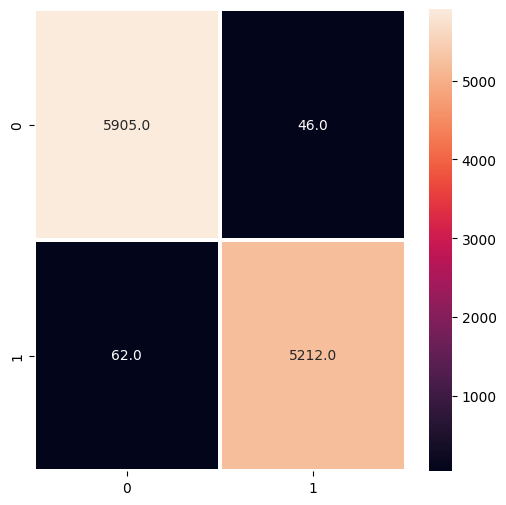

In [47]:
confusion_matrix = confusion_matrix(y_pred=y_pred,y_true=Y_test)

fig,ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix,annot=True,fmt="0.1f",linewidths=1.5)
plt.show()